In [25]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [ ]:
def draw_line(slope=0, intercept=0, x=None, color='r'):
    if x is None:
        x1, x2, y1, y2 = plots.gca().axis()
    x = make_array(x1, x2)
    y = x*slope + intercept
    plots.plot(x, y, color=color)

## Residuals

In [26]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [27]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [28]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [29]:
heights = heights.with_column(
    'Fitted Value', fitted_values(heights, 'MidParent', 'Child'),
    'Residual', residuals(heights, 'MidParent', 'Child')
)
heights

MidParent,Child,Fitted Value,Residual
75.43,73.2,70.7124,2.48763
75.43,69.2,70.7124,-1.51237
75.43,69,70.7124,-1.71237
75.43,69,70.7124,-1.71237
73.66,73.5,69.5842,3.91576
73.66,72.5,69.5842,2.91576
73.66,65.5,69.5842,-4.08424
73.66,65.5,69.5842,-4.08424
72.06,71,68.5645,2.43553
72.06,68,68.5645,-0.564467


In [30]:
correlation(heights, 'MidParent', 'Child')

0.32094989606395924

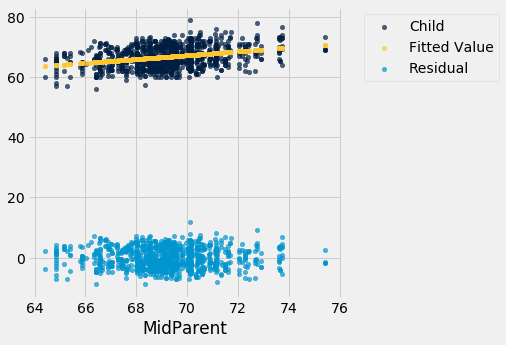

In [31]:
heights.scatter('MidParent')

In [32]:
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    tbl.select(x, y, 'Fitted').scatter(0)
    tbl.scatter(x, 'Residual')

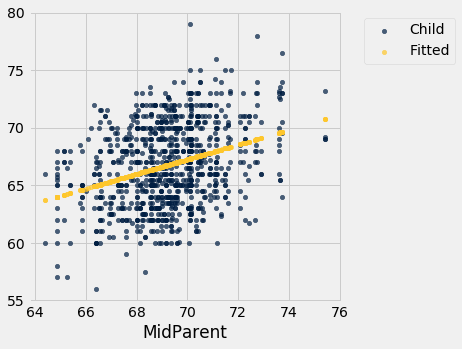

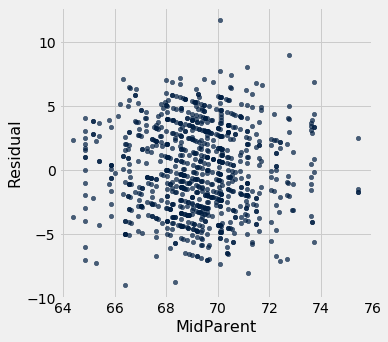

In [33]:
plot_residuals(heights, 'MidParent', 'Child')

## Diagnostics with Residuals ##

In [34]:
dugong = Table.read_table('dugong.csv')
dugong.show(5)

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5


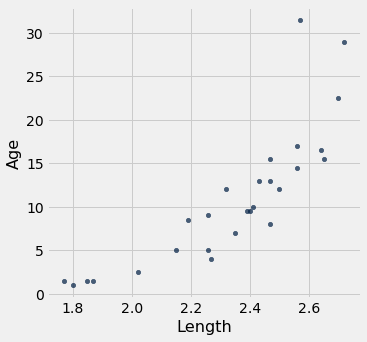

In [35]:
dugong.scatter('Length', 'Age')

In [36]:
correlation(dugong, 'Length', 'Age')

0.82964745549057139

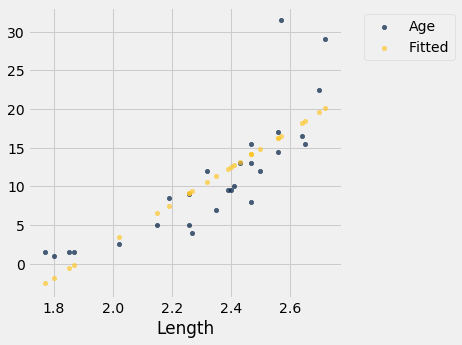

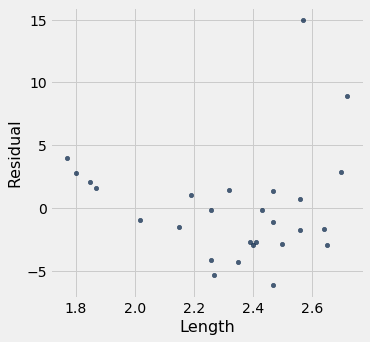

In [37]:
plot_residuals(dugong, 'Length', 'Age')

In [38]:
us_women = Table.read_table('us_women.csv')
us_women.show(5)

height,ave weight
58,115
59,117
60,120
61,123
62,126


In [39]:
correlation(us_women, 'height', 'ave weight')

0.99549476778421608

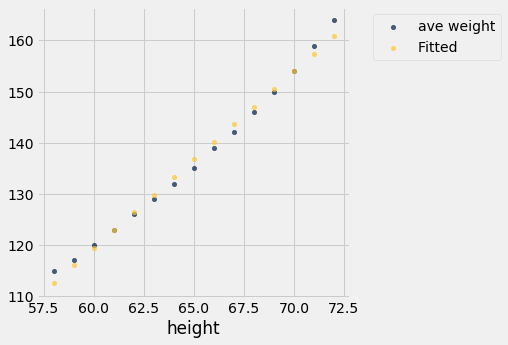

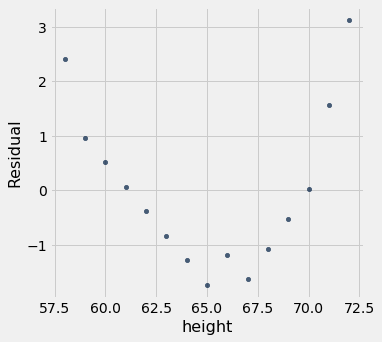

In [40]:
plot_residuals(us_women, 'height', 'ave weight')

In [41]:
demographics = Table.read_table('district_demographics2016.csv')
demographics.show(5)

State,District,Median Income,Percent voting for Clinton,College%
Alabama,"Congressional District 1 (115th Congress), Alabama",47083,34.1,24
Alabama,"Congressional District 2 (115th Congress), Alabama",42035,33,21.8
Alabama,"Congressional District 3 (115th Congress), Alabama",46544,32.3,22.8
Alabama,"Congressional District 4 (115th Congress), Alabama",41110,17.4,17
Alabama,"Congressional District 5 (115th Congress), Alabama",51690,31.3,30.3


In [42]:
correlation(demographics, 'Median Income', 'Percent voting for Clinton')

0.18350753861019928

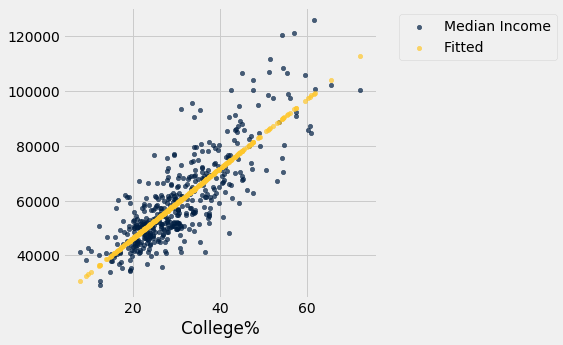

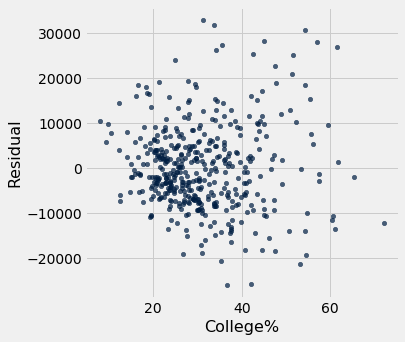

In [43]:
plot_residuals(demographics, 'College%', 'Median Income')

## Average of Residuals ##

In [44]:
round(np.average(residuals(dugong, 'Length', 'Age')), 6)

0.0

In [45]:
round(np.average(residuals(heights, 'MidParent', 'Child')), 6)

0.0

In [46]:
round(np.average(residuals(demographics, 'Median Income', 'Percent voting for Clinton')), 6)

-0.0

In [61]:
round(np.mean(heights.column('Residual')), 6)

5.2567990407947457e-15

In [62]:
round(correlation(heights, 'MidParent', 'Residual'), 6)

-2.7196898076470642e-16

In [63]:
round(correlation(heights, 'Fitted Value', 'Residual'), 6)

-3.8608183982682104e-16

## A Measure of Clustering ##

In [64]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

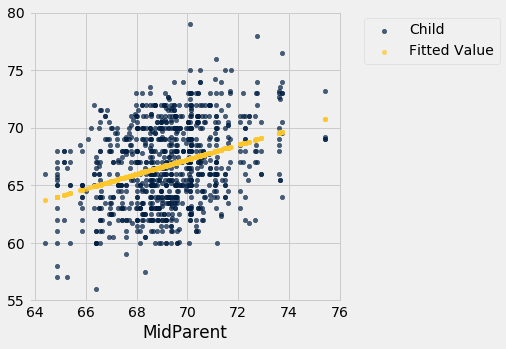

In [65]:
plot_fitted(heights, 'MidParent', 'Child')

In [66]:
child_predictions_sd = np.std(fitted_values(heights, 'MidParent', 'Child'))
child_observed_sd = np.std(heights.column('Child'))
print(child_predictions_sd)
print(child_observed_sd)

1.14814516838
3.57733460101


In [67]:
child_predictions_sd / child_observed_sd

0.32094989606395957

In [68]:
correlation(heights, 'MidParent', 'Child')

0.32094989606395924

In [69]:
correlation(dugong, 'Length', 'Age')

0.82964745549057139

In [70]:
dugong_prediction_sd = np.std(fitted_values(dugong, 'Length', 'Age'))
dugong_observed_sd = np.std(dugong.column(1))
dugong_prediction_sd / dugong_observed_sd

0.82964745549057128

In [71]:
hybrid = Table.read_table('hybrid.csv')
hybrid.show(5)

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact


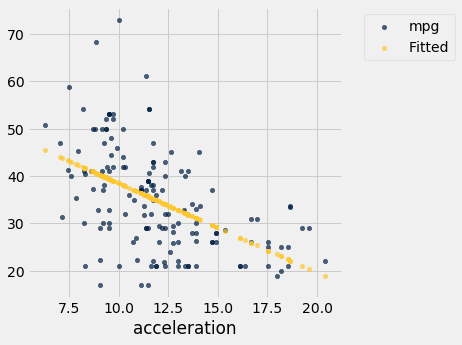

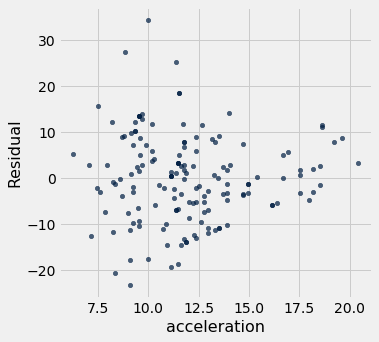

In [72]:
plot_residuals(hybrid, 'acceleration', 'mpg')

In [73]:
correlation(hybrid, 'acceleration', 'mpg')

-0.5060703843771186

In [74]:
np.std(fitted_values(hybrid, 'acceleration', 'mpg'))/np.std(hybrid.column('mpg'))

0.5060703843771186

No matter what the shape of the scatter plot, the SD of the fitted values is a fraction of the SD of the observed values of $y$. The fraction is |r|.

$$
\frac{\mbox{SD of fitted values}}{\mbox{SD of }y} ~=~ |r| ~~~~~~~~~~ \mbox{That is,} ~~ \mbox{SD of fitted values} = |r|\cdot \mbox{SD of }y
$$

## SD of the Residuals ##
No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the observed values of $y$. The fraction is  $\sqrt{1-r^2}$.

$$
\mbox{SD of residuals} ~=~ \sqrt{1 - r^2} \cdot \mbox{SD of }y
$$

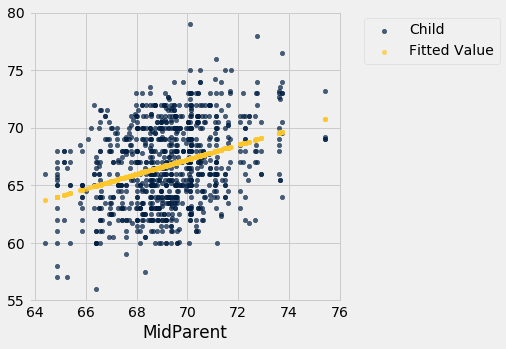

In [75]:
plot_fitted(heights, 'MidParent', 'Child')

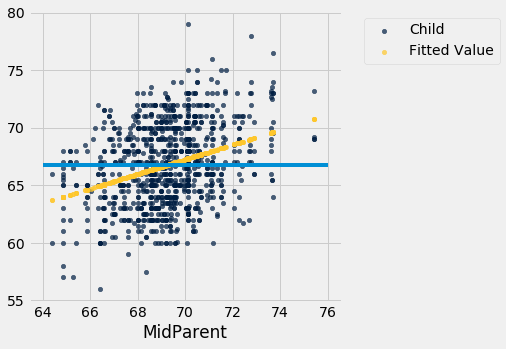

In [76]:
plot_fitted(heights, 'MidParent', 'Child')
ave_child = np.mean(heights.column('Child'))
plots.plot([64, 76], [ave_child, ave_child]);

In [77]:
np.std(heights.column('Child')) ** 2

12.797322847553064

In [78]:
np.std(residuals(heights, 'MidParent', 'Child')) ** 2

11.479085519881471

In [79]:
np.std(heights.column('Fitted Value')) ** 2

1.3182373276715966

In [80]:
np.std(dugong.column('Age')) ** 2

59.635802469135804

In [81]:
np.std(fitted_values(dugong, 'Length', 'Age')) ** 2

41.048211436935333

In [82]:
np.std(residuals(dugong, 'Length', 'Age')) ** 2

18.58759103220045

In [83]:
r = correlation(heights, 'MidParent', 'Child')
r

0.32094989606395924

In [84]:
np.sqrt(1 - r**2) * np.std(heights.column('Child'))

3.3880799163953421

In [85]:
np.std(residuals(hybrid, 'acceleration', 'mpg'))

9.4327368334302903

In [86]:
r = correlation(hybrid, 'acceleration', 'mpg')
r

-0.5060703843771186

In [87]:
np.sqrt(1 - r**2)*np.std(hybrid.column('mpg'))

9.4327368334302903